In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Folium installed
Libraries imported.


In [2]:
import os
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# First we look for our data and transform it into a dataframe.

In [4]:
# The code was removed by Watson Studio for sharing.

,Latitud,Longitud,Nombre_farmacia
0,-33.450806,-70.677501,CRUZ VERDE
1,-33.437406,-70.654749,SALCOBRAND
2,-33.444407,-70.655378,SALCOBRAND
3,-33.444274,-70.657607,SALCOBRAND
4,-33.439681,-70.655282,SALCOBRAND


In [5]:
df.shape


(197, 3)

# We enter to Foursquare

In [7]:
CLIENT_ID = 'EPHCWCHQ1WGIQOVJLODY4K3CHWDYOSY3VTDG3SSWP113CPAR' # your Foursquare ID
CLIENT_SECRET = 'XU25LZIKAEBVYDRBBZZMCW3YSMBQUYQLKJ5WMUOEULYF3BHU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


Your credentails:
CLIENT_ID: EPHCWCHQ1WGIQOVJLODY4K3CHWDYOSY3VTDG3SSWP113CPAR
CLIENT_SECRET:XU25LZIKAEBVYDRBBZZMCW3YSMBQUYQLKJ5WMUOEULYF3BHU


# We find the coordinates of santiagos to locate us on a Folium map.

In [9]:
address = 'Santiago, Chile'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santiago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santiago are -33.4377968, -70.6504451.


# We created a map showing the number of pharmacies in the commune.

In [11]:
map_stgo = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(df['Latitud'], df['Longitud'], df['Nombre_farmacia']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_stgo)  
    
    
    mc = MarkerCluster()
#creating a Marker for each point in df_sample. Each point will get a popup with their zip
for row in df.itertuples():
    mc.add_child(folium.Marker(location=[row.Latitud,  row.Longitud],
                 popup=row.Nombre_farmacia))
 
map_stgo.add_child(mc)

    
map_stgo

# We look for the K to perform the clustering.

In [13]:
dfg = df.drop('Nombre_farmacia', 1)

In [14]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dfg)
    Sum_of_squared_distances.append(km.inertia_)

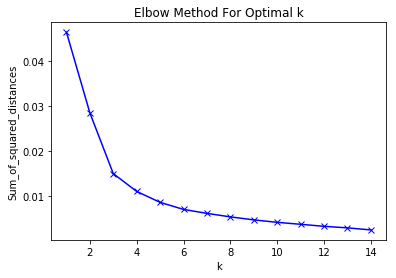

In [15]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# With our K = 4 we perform the clustering.

[[-33.46781331 -70.64507238]
 [-33.44096974 -70.65109503]
 [-33.44562673 -70.63623736]
 [-33.44507309 -70.6717835 ]]


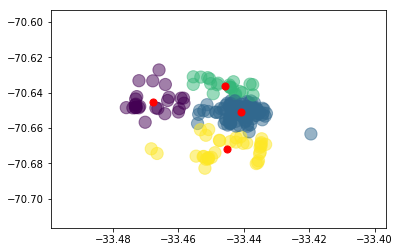

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



kmeans = KMeans(n_clusters=4).fit(dfg)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(dfg['Latitud'], dfg['Longitud'], c= kmeans.labels_.astype(float), s=150, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# Now we will filter again the initial dataframe taking 4 groups, the 3 primary chains of drugs plus one in which all the others are.

In [19]:
cv_df=df[df.Nombre_farmacia == 'CRUZ VERDE']
cv_df.head()

,Latitud,Longitud,Nombre_farmacia
0,-33.450806,-70.677501,CRUZ VERDE
14,-33.440679,-70.653243,CRUZ VERDE
15,-33.442373,-70.656187,CRUZ VERDE
16,-33.440225,-70.668661,CRUZ VERDE
17,-33.439456,-70.653961,CRUZ VERDE


In [20]:
cv_df.shape

(43, 3)

In [21]:
ahu_df=df[df.Nombre_farmacia == 'AHUMADA']
ahu_df.head()

,Latitud,Longitud,Nombre_farmacia
5,-33.442348,-70.665591,AHUMADA
6,-33.440019,-70.649679,AHUMADA
7,-33.444903,-70.658318,AHUMADA
8,-33.444085,-70.654269,AHUMADA
12,-33.434793,-70.669061,AHUMADA


In [22]:
ahu_df.shape

(15, 3)

In [23]:
sb_df=df[df.Nombre_farmacia == 'SALCOBRAND']
sb_df.head()

,Latitud,Longitud,Nombre_farmacia
1,-33.437406,-70.654749,SALCOBRAND
2,-33.444407,-70.655378,SALCOBRAND
3,-33.444274,-70.657607,SALCOBRAND
4,-33.439681,-70.655282,SALCOBRAND
66,-33.440481,-70.648611,SALCOBRAND


In [24]:
sb_df.shape

(23, 3)

In [25]:
el = df.drop(df[(df.Nombre_farmacia == 'SALCOBRAND')].index)
el1= el.drop(df[(df.Nombre_farmacia == 'AHUMADA')].index)
el2= el1.drop(df[(df.Nombre_farmacia == 'CRUZ VERDE')].index)
el2.head()

,Latitud,Longitud,Nombre_farmacia
9,-33.433471,-70.653276,MANRIQUEZ
10,-33.434523,-70.666099,FRANCESA
11,-33.434659,-70.668311,JARDIN
13,-33.434691,-70.670191,TORRES
23,-33.434969,-70.673558,RENACER


In [26]:
el2.shape

(116, 3)

# Finally we locate the group location by color on a map.

In [28]:
map_Stgo = folium.Map(location=[latitude, longitude], zoom_start=15)

# add markers to map
for lat, lng, label in zip(cv_df['Latitud'], cv_df['Longitud'], cv_df['Nombre_farmacia']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Stgo)  
    
for lat, lng, label in zip(ahu_df['Latitud'], ahu_df['Longitud'], ahu_df['Nombre_farmacia']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Stgo)  
    
for lat, lng, label in zip(sb_df['Latitud'], sb_df['Longitud'], sb_df['Nombre_farmacia']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Stgo)  
    
for lat, lng, label in zip(el2['Latitud'], el2['Longitud'], el2['Nombre_farmacia']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='pink',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Stgo)  
    
    

    
map_Stgo

# With what we can appreciate how the big chains are in a preferential place in the center while the others are in peripheral places.